## 1) Présentation du contexte

Pour ce projet, on va imaginer qu'un de nos proches soit responsable d'établissement; il est particulièrement soucieux de la bonne marche de son établissement et surtout des bons résultats de ses élèves. Dans cette optique, il a collecté des données sur ces derniers durant le dernier trimestre, dont les notes de ses élèves dans trois matières : mathématiques, lecture et écriture. Il sait que nous sommes analyste de données, il vient donc nous voir pour que nous lui fassions savoir si/comment les variables des données récoltées influencent les notes de ses élèves; tout ceci afin qu'il puisse prendre des mesures en conséquence dans la mesure du possible.

Nous allons donc mener cette analyse. Tout au long, nous garderons à l'esprit le processus d'analyse de données qui est le suivant : **Questionnement -> Acquisition (Collecte, Évaluation, Nettoyage) -> Analyse (avec notamment des visualisations) -> Conclusions**. Ce processus n'est pas forcément linéaire, mais itératif. Outre les trois notes, cinq caractéristiques ont été enregistrées sur les enfants : 
- le genre
- la race ou l'ethnie
- le niveau d'éducation des parents de l'enfant
- le type de repas qui lui est fourni à l'école
- si oui ou non il a suivi le cours de préparation que l'école organise avant les évaluations.


## 2) Importation des librairies et familiarisation avec le jeu de données

Commençons par importer les librairies dont nous aurons besoin pour la manipulation des données et leur visualisation : 

In [19]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_style("dark")

Importons maintenant le jeu de données dans l'environnement : 

In [2]:
df = pd.read_csv('../datasets/exams.csv')
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Affichons des informations globales sur le jeu de données : 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Nous avons donc **1000** élèves donc nous disposons toutes les informations récoltées.

On veut savoir combien de lignes entières sont dupliquées dans votre jeu de données : 

In [6]:
df.duplicated().sum()

1

Nous avons donc **deux lignes** qui contiennent exactement les mêmes informations. En général on doit supprimer les lignes doublons pour avoir une analyse non biaisée par une répétition inutile d'informations; ces doublons sont souvent le résultat d'une erreur d'inattention ou d'un bogue du logiciel utilisé pour rapporter les informations. 

Cependant, pour ce cas qui nous concerne, ce n'est pas nécessairement le cas vu qu'il est tout à fait réaliste de se dire que deux élèves aient eu exactement les mêmes informations sur 8 colonnes. La ligne doublon n'est donc pas nécessairement une duplication des informations sur le même élève. Nous ne supprimerons donc pas ce doublon.

## 3) Évaluation et nettoyage

Dans un premier temps, on remarque que certains noms de colonnes contiennent des espaces; et aussi qu'une colonne contient un caractère spécial ("*/*"); le fait d'avoir un espace ou un caractère spécial dans un nom de colonne peut poser des problèmes lorsqu'il faudra utiliser ces colonnes-là plus tard, par exemple avec la méthode `query`. Nous allons donc les renommer : 

Proposer un code pour renommer les colonnes qui ont ce problème de telle sorte que les espaces et le caractère spécial sont remplacés par un underscore ("\_") :

In [7]:
df = df.rename(columns={"race/ethnicity" : "race_ethnicity",
                   "parental level of education" : "parental_level_of_education",
                   "test preparation course" : "test_preparation_course",
                   "math score" : "math_score",
                   "reading score" : "reading_score",
                   "writing score" : "writing_score"
             })
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

Bien. Dans un deuxième temps, il est important de faire une remarque quant à la variable relative au niveau d'éducation parental; elle est de type qualitative ordinale. 

***PS:*** Le type de la variable en elle-même, pas celui par lequel elle est encodée dans le dataframe !

Fort de ce constat, on va mettre cette variable à un type approprié qui va permettre notamment de ne pas avoir besoin de se soucier de l'ordre des catégories de cette variable lors de la visualisation :

In [8]:
df.parental_level_of_education.value_counts()

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental_level_of_education, dtype: int64

In [9]:
e_categories = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]
e_classes = pd.api.types.CategoricalDtype(ordered=True, categories=e_categories)
df['parental_level_of_education'] = df['parental_level_of_education'].astype(e_classes)

In [10]:
# nouveau type de la cellule
df.parental_level_of_education.dtype

CategoricalDtype(categories=['some high school', 'high school', 'some college',
                  'associate's degree', 'bachelor's degree',
                  'master's degree'],
, ordered=True)

## 4) Exploration univariée

Nous ferons une exploration univariée de chaque variable en commençant par nos trois variables qu'on cherche à expliquer. 

In [23]:
base_color = sb.color_palette()[9]

#### Note de maths

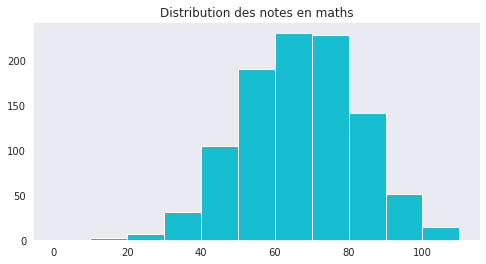

In [51]:
bins = np.arange(0, 111, 10)
plt.figure(figsize=[8, 4])
plt.hist(data=df, x='math_score', bins = bins, color=base_color)
plt.title("Distribution des notes en maths");

On a une répartition en cloche des notes de maths.

#### Note de lecture

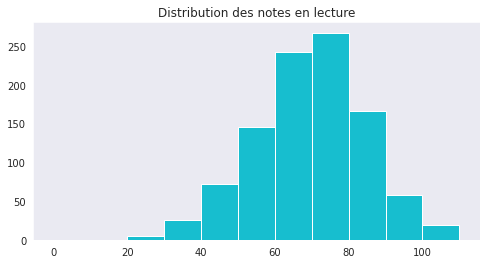

In [50]:
bins = np.arange(0, 111, 10)
plt.figure(figsize=[8, 4])
plt.hist(data=df, x='reading_score', bins = bins, color=base_color)
plt.title("Distribution des notes en lecture");

La répartition des notes de lecture est légèrement inclinée vers la droite.

#### Note d'écriture

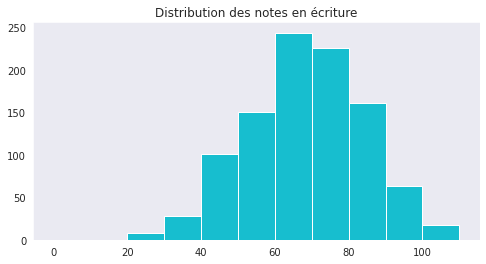

In [52]:
bins = np.arange(0, 111, 10)
plt.figure(figsize=[8, 4])
plt.hist(data=df, x='writing_score', bins = bins, color=base_color)
plt.title("Distribution des notes en écriture");

#### Le genre des élèves

In [11]:
df['gender'].value_counts()

male      517
female    483
Name: gender, dtype: int64

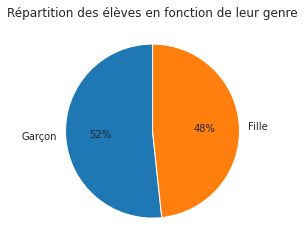

In [54]:
gen_order = df['gender'].value_counts()
plt.pie(gen_order, labels=["Garçon", "Fille"], startangle=90, autopct='%1.0f%%')
plt.title("Répartition des élèves en fonction de leur genre");

La répartition de genre est assez équilibrée, c'est super !

#### La race ou l'ethnie

Nous analyserons cette variable à titre purement informatif pour ne tirer aucune conclusion tribaliste.

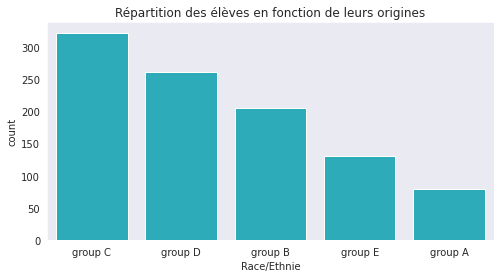

In [32]:
plt.figure(figsize=[8, 4])
race_order = df["race_ethnicity"].value_counts()
sb.countplot(data=df, x='race_ethnicity', color=base_color, order=race_order.index)
plt.xlabel("Race/Ethnie")
plt.title("Répartition des élèves en fonction de leurs origines");

#### Le niveau d'éducation parental

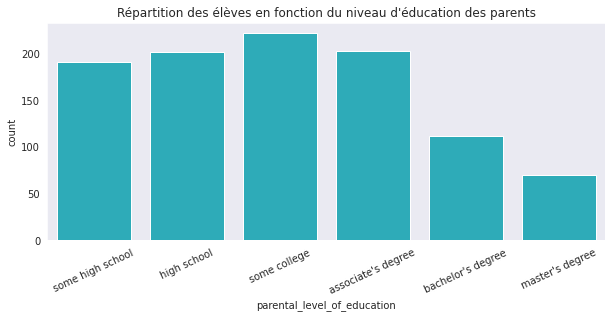

In [36]:
plt.figure(figsize=[10, 4])
sb.countplot(data=df, x='parental_level_of_education', color=base_color)
plt.xticks(rotation=25)
plt.title("Répartition des élèves en fonction du niveau d'éducation des parents");

#### Type de service repas auquel l'enfant est abonné

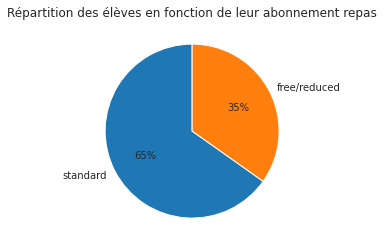

In [39]:
lunch_order = df["lunch"].value_counts()
plt.pie(lunch_order, labels=lunch_order.index, startangle=90, autopct='%1.0f%%')
plt.title("Répartition des élèves en fonction de leur abonnement repas");

#### Participation au cours de préparation au test

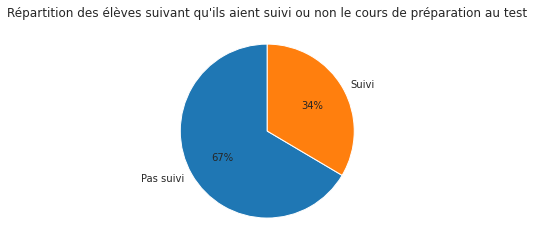

In [41]:
test_order = df["test_preparation_course"].value_counts()
plt.pie(test_order, labels=["Pas suivi", "Suivi"], startangle=90, autopct='%1.0f%%')
plt.title("Répartition des élèves suivant qu'ils aient suivi ou non le cours de préparation au test");

## 5) Exploration multivariée

À part les notes, nous avons cinq variables que nous rappelons ici :

- le genre
- la race ou l'ethnie
- le niveau d'éducation des parents de l'enfant
- le type de repas qui lui est fourni à l'école
- si oui ou non il a suivi le cours de préparation que l'école organise avant les évaluations.

Parmi les cinq, le responsable de l'établissement ne peut agir que sur **le type de repas que les enfants reçoivent** et **si oui ou non un élève a suivi le cours de préparation**.

C'est important de s'attarder là-dessus parce que c'est l'étude de ces variables-là qui va surtout intéresser le responsable; il faudra donc commencer par elles plus-bas. L'étude des autres pourra servir également, mais surtout à titre informatif; pas nécessairement par rapport à la prise de décision surtout si le responsable se veut respectueux de l'éthique. 

Il sera question de voir l'interaction entre chacune des cinq variables et chacune des trois notes : 

#### lunch vs math_score, reading_score and writing_score

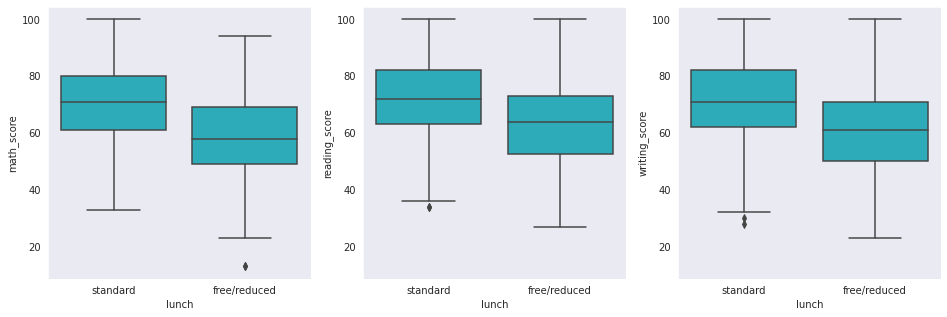

In [56]:
plt.figure(figsize=[16, 5])
plt.subplot(1, 3, 1)
first = sb.boxplot(data=df, x='lunch', y='math_score', color=base_color)

plt.subplot(1, 3, 2)
second = sb.boxplot(data=df, x='lunch', y='reading_score', color=base_color)
second.sharey(first)

plt.subplot(1, 3, 3)
third = sb.boxplot(data=df, x='lunch', y='writing_score', color=base_color)
third.sharey(first);

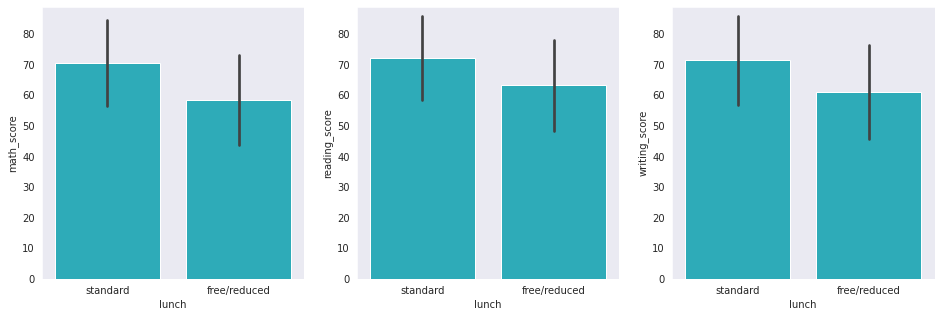

In [57]:
plt.figure(figsize=[16, 5])
plt.subplot(1, 3, 1)
first = sb.barplot(data=df, x='lunch', y='math_score', ci='sd', color=base_color)

plt.subplot(1, 3, 2)
second = sb.barplot(data=df, x='lunch', y='reading_score', ci='sd', color=base_color)
second.sharey(first)

plt.subplot(1, 3, 3)
third = sb.barplot(data=df, x='lunch', y='writing_score', ci='sd', color=base_color)
third.sharey(first);

Les résultats sont formels : les enfants abonnés *Standard* ont dans l'ensemble de bien meilleures notes que les autres dans les trois matières !

#### test_preparation_course vs math_score, reading_score and writing_score¶

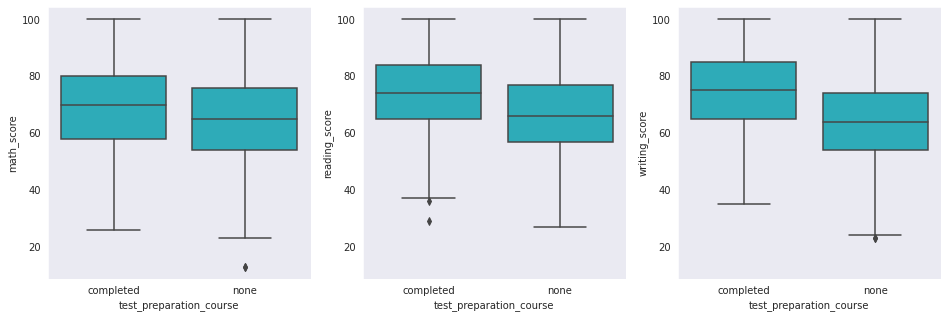

In [58]:
plt.figure(figsize=[16, 5])
plt.subplot(1, 3, 1)
first = sb.boxplot(data=df, x='test_preparation_course', y='math_score', color=base_color)

plt.subplot(1, 3, 2)
second = sb.boxplot(data=df, x='test_preparation_course', y='reading_score', color=base_color)
second.sharey(first)

plt.subplot(1, 3, 3)
third = sb.boxplot(data=df, x='test_preparation_course', y='writing_score', color=base_color)
third.sharey(first);

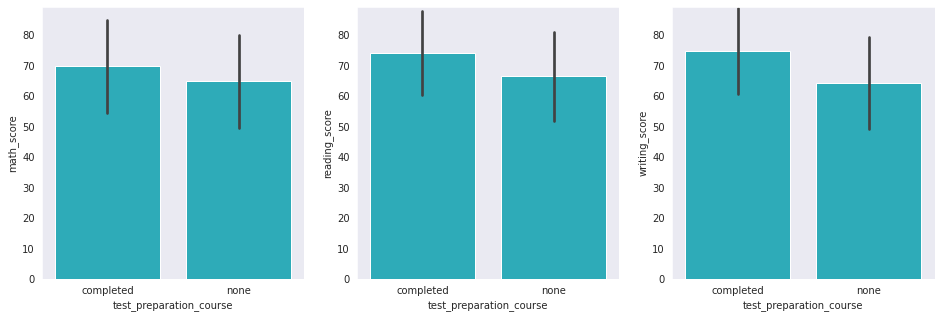

In [59]:
plt.figure(figsize=[16, 5])
plt.subplot(1, 3, 1)
first = sb.barplot(data=df, x='test_preparation_course', y='math_score', ci='sd', color=base_color)

plt.subplot(1, 3, 2)
second = sb.barplot(data=df, x='test_preparation_course', y='reading_score', ci='sd', color=base_color)
second.sharey(first)

plt.subplot(1, 3, 3)
third = sb.barplot(data=df, x='test_preparation_course', y='writing_score', ci='sd', color=base_color)
third.sharey(first);

Dans ce cas aussi les résultats sont formels : les enfants ayant suivi le cours de préparation au test ont dans l'ensemble de bien meilleures notes que les autres dans les trois matières !

#### gender vs math_score, reading_score and writing_score

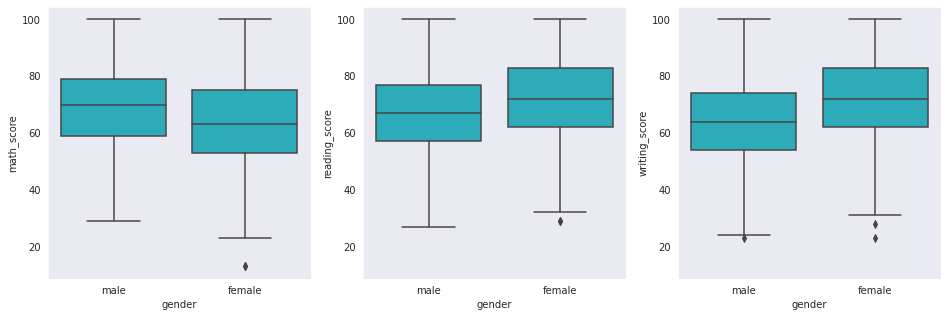

In [53]:
plt.figure(figsize=[16, 5])
plt.subplot(1, 3, 1)
first = sb.boxplot(data=df, x='gender', y='math_score', color=base_color)

plt.subplot(1, 3, 2)
second = sb.boxplot(data=df, x='gender', y='reading_score', color=base_color)
second.sharey(first)

plt.subplot(1, 3, 3)
third = sb.boxplot(data=df, x='gender', y='writing_score', color=base_color)
third.sharey(first);

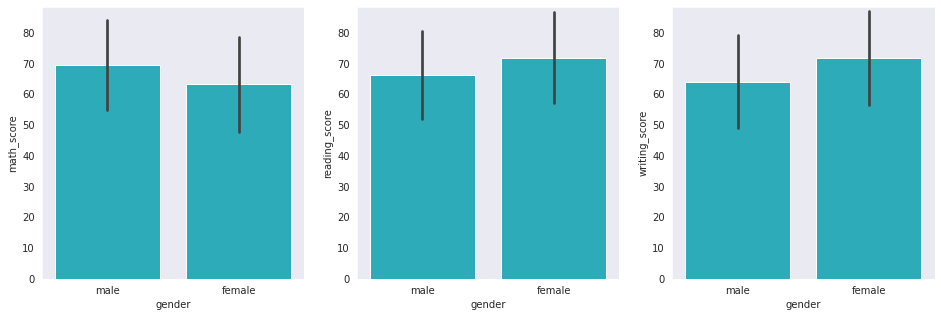

In [55]:
plt.figure(figsize=[16, 5])
plt.subplot(1, 3, 1)
first = sb.barplot(data=df, x='gender', y='math_score', ci='sd', color=base_color)

plt.subplot(1, 3, 2)
second = sb.barplot(data=df, x='gender', y='reading_score', ci='sd', color=base_color)
second.sharey(first)

plt.subplot(1, 3, 3)
third = sb.barplot(data=df, x='gender', y='writing_score', ci='sd', color=base_color)
third.sharey(first);

Intéressant... Les garçons sont en général meilleurs en maths que les filles; ces dernières sont meilleures que les garçons en lecture et en écriture.

#### parental_level_of_education vs math_score, reading_score and writing_score

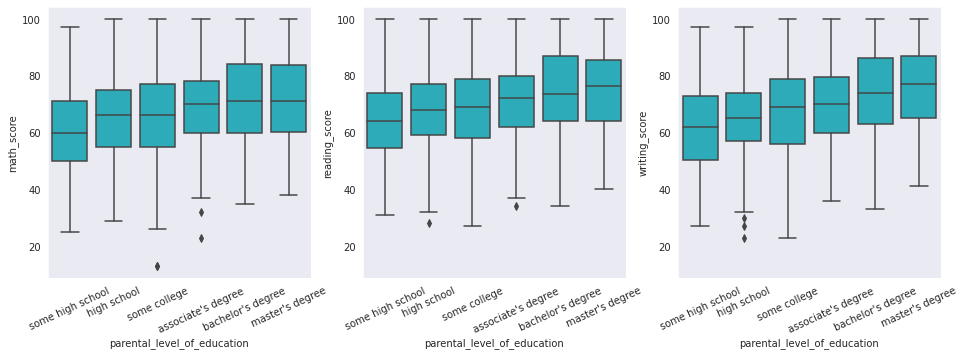

In [60]:
plt.figure(figsize=[16, 5])
plt.subplot(1, 3, 1)
first = sb.boxplot(data=df, x='parental_level_of_education', y='math_score', color=base_color)
plt.xticks(rotation=25)

plt.subplot(1, 3, 2)
second = sb.boxplot(data=df, x='parental_level_of_education', y='reading_score', color=base_color)
second.sharey(first)
plt.xticks(rotation=25)

plt.subplot(1, 3, 3)
third = sb.boxplot(data=df, x='parental_level_of_education', y='writing_score', color=base_color)
plt.xticks(rotation=25)
third.sharey(first);

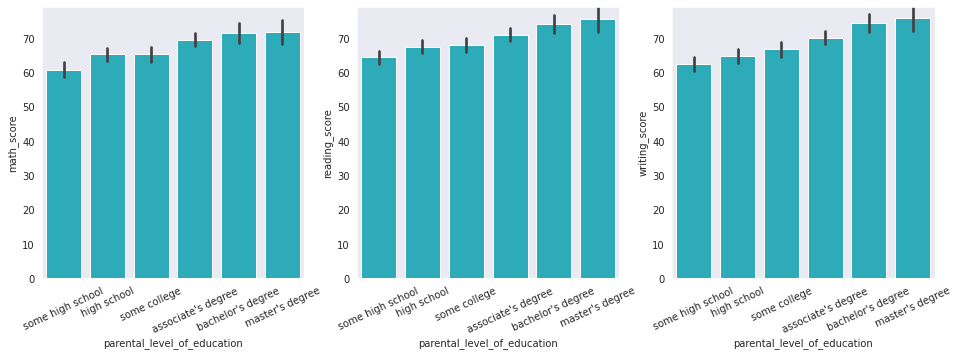

In [61]:
plt.figure(figsize=[16, 5])
plt.subplot(1, 3, 1)
first = sb.barplot(data=df, x='parental_level_of_education', y='math_score', color=base_color)
plt.xticks(rotation=25)

plt.subplot(1, 3, 2)
second = sb.barplot(data=df, x='parental_level_of_education', y='reading_score', color=base_color)
second.sharey(first)
plt.xticks(rotation=25)

plt.subplot(1, 3, 3)
third = sb.barplot(data=df, x='parental_level_of_education', y='writing_score', color=base_color)
plt.xticks(rotation=25)
third.sharey(first);

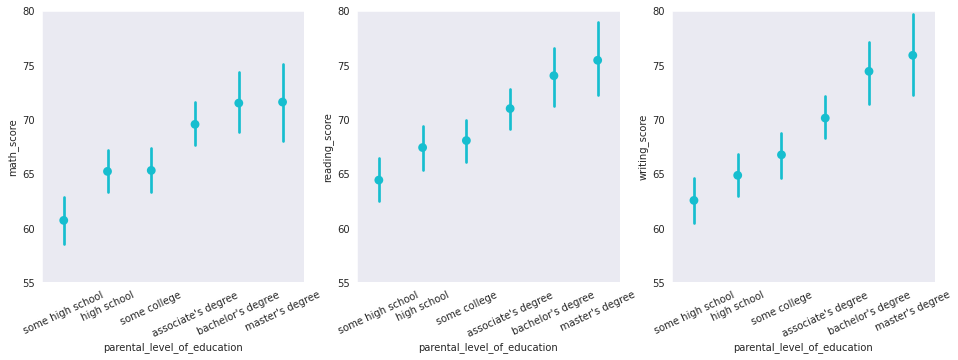

In [62]:
plt.figure(figsize=[16, 5])
plt.subplot(1, 3, 1)
first = sb.pointplot(data=df, x='parental_level_of_education', y='math_score', color=base_color, linestyles='')
plt.ylim(55, 80)
plt.xticks(rotation=25)

plt.subplot(1, 3, 2)
second = sb.pointplot(data=df, x='parental_level_of_education', y='reading_score', color=base_color, linestyles='')
second.sharey(first)
plt.xticks(rotation=25)

plt.subplot(1, 3, 3)
third = sb.pointplot(data=df, x='parental_level_of_education', y='writing_score', color=base_color, linestyles='')
plt.xticks(rotation=25)
third.sharey(first);

La corrélation est positive entre le niveau d'éducation parental et les notes : plus les parents ont suivi des études universitaires, meilleure en général est la note de l'enfant.

#### reading_score vs writing_score

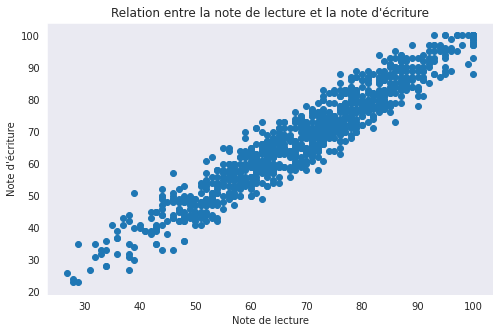

In [71]:
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x='reading_score', y='writing_score')
plt.title("Relation entre la note de lecture et la note d'écriture")
plt.xlabel('Note de lecture')
plt.ylabel("Note d'écriture");

On voit une corrélation linéaire croissante entre les deux; ça peut être intéressant à savoir par exemple dans le cas où le directeur n'a pas un budget assez élevé pour assurer les cours de soutien aussi bien en lecture qu'en écriture. Dans ce cas il peut par exemple organiser juste les cours de soutien pour la lecture, avec la certitude que si les enfants travaillent mieux en lecture, ils seront meilleurs en écriture également !

## 6) Recommandations

Par rapport à l'étude que vous avez faites des variables sur lesquelles le responsable peut agir, nous ferions à notre ami directeur les recommandations suivantes : 

1. Faire des campagnes pour inciter les parents qui ne l'ont pas fait à choisir l'abonnement *Standard* pour le déjeuner de leur enfant; à la limite le rendre obligatoire pour tous les élèves de l'établissement

2. Rendre obligatoire le cours de préparation au test pour tout examen

Merci de nous avoir suivi dans cette aventure !